# The best place to host a airbnb in Manhattan, NY

## 1. Introduction

### Businese Problem

Airbnb is becoming a serious business in recent years. Other than individual hosts who share their own places, companies around the world also steps in this new business. Reports showed that about 2 million people stay in Airbnb rentals across the world during an average night in 2018. In this project, we want to find out what is the best place to host an airbnb in Manhattan, New York. Furthermore, we are also interested in the patterns behind those bestsellers. We can implement those patterns in other cities afterwards.For example, we can find the venues similarity between popular airbnb hosts by using FourSquare api.
All of the data came from [kaggle.com](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data).

### Interested Audience

Any companies or individuals who want to do serious business on the Airbnb platform. Actually, Airbnb itself has an Airbnb PLUS plan to give better service with the authorized hosts. Those professions should find this very useful as choosing a location ahead of starting a business.

## 2. Data Collection

Target Data:
  * List of Boroughs and neighborhoods of Manhattan with latitude and longitude
  * List of airbnb houses in Manhattan with Latitude and longitude
  * List of attendence of each airbnb
  * Venues for each Manhattan neighborhoods

Data source and Preprocessing:
  * Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups
  * Use kaggle.com find a open dataset including details about airbnb hosts in Manhattan.
  * Use Foursquare and geopy data to map the location of rental places

## Preprocessing

In [53]:
import pandas as pd
import numpy as np
import folium
import requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics

In [15]:
NYdata = pd.read_csv('/Users/wei/Downloads/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
columns = ['id', 'name', 'host_id', 'host_name', 'Borough',
           'Neighborhood', 'Latitude', 'Longitude', 'room_type', 'price',
           'minimum_nights', 'number_of_reviews', 'last_review',
           'reviews_per_month', 'calculated_host_listings_count',
           'availability_365']
NYdata.columns = columns
NYdata.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name    Borough  Neighborhood  Latitude  Longitude        room_type  \
0         John   Brooklyn    Kensington  40.64749  -73.97237     Private room   
1     Jennifer  Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2    Elisabeth  Manhattan        Harlem  40.80902  -73.94190     Private room   
3  LisaRoxanne   Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4        Laura  Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

The dataset is too big to analyse. Therefore, I randomly chose 10% of the data from Manhattan to show on the map

In [16]:
NYdata_df = NYdata.sample(frac=0.01)
NYdata_df = NYdata_df[NYdata_df['Borough'] == 'Manhattan']
NYdata_df.shape

(233, 16)

In [17]:
latitude = 40.7128
longitude = -74.0060
map_NY = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(NYdata_df['Latitude'], NYdata_df['Longitude'], NYdata_df['Borough'], NYdata_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)


In [18]:
map_NY

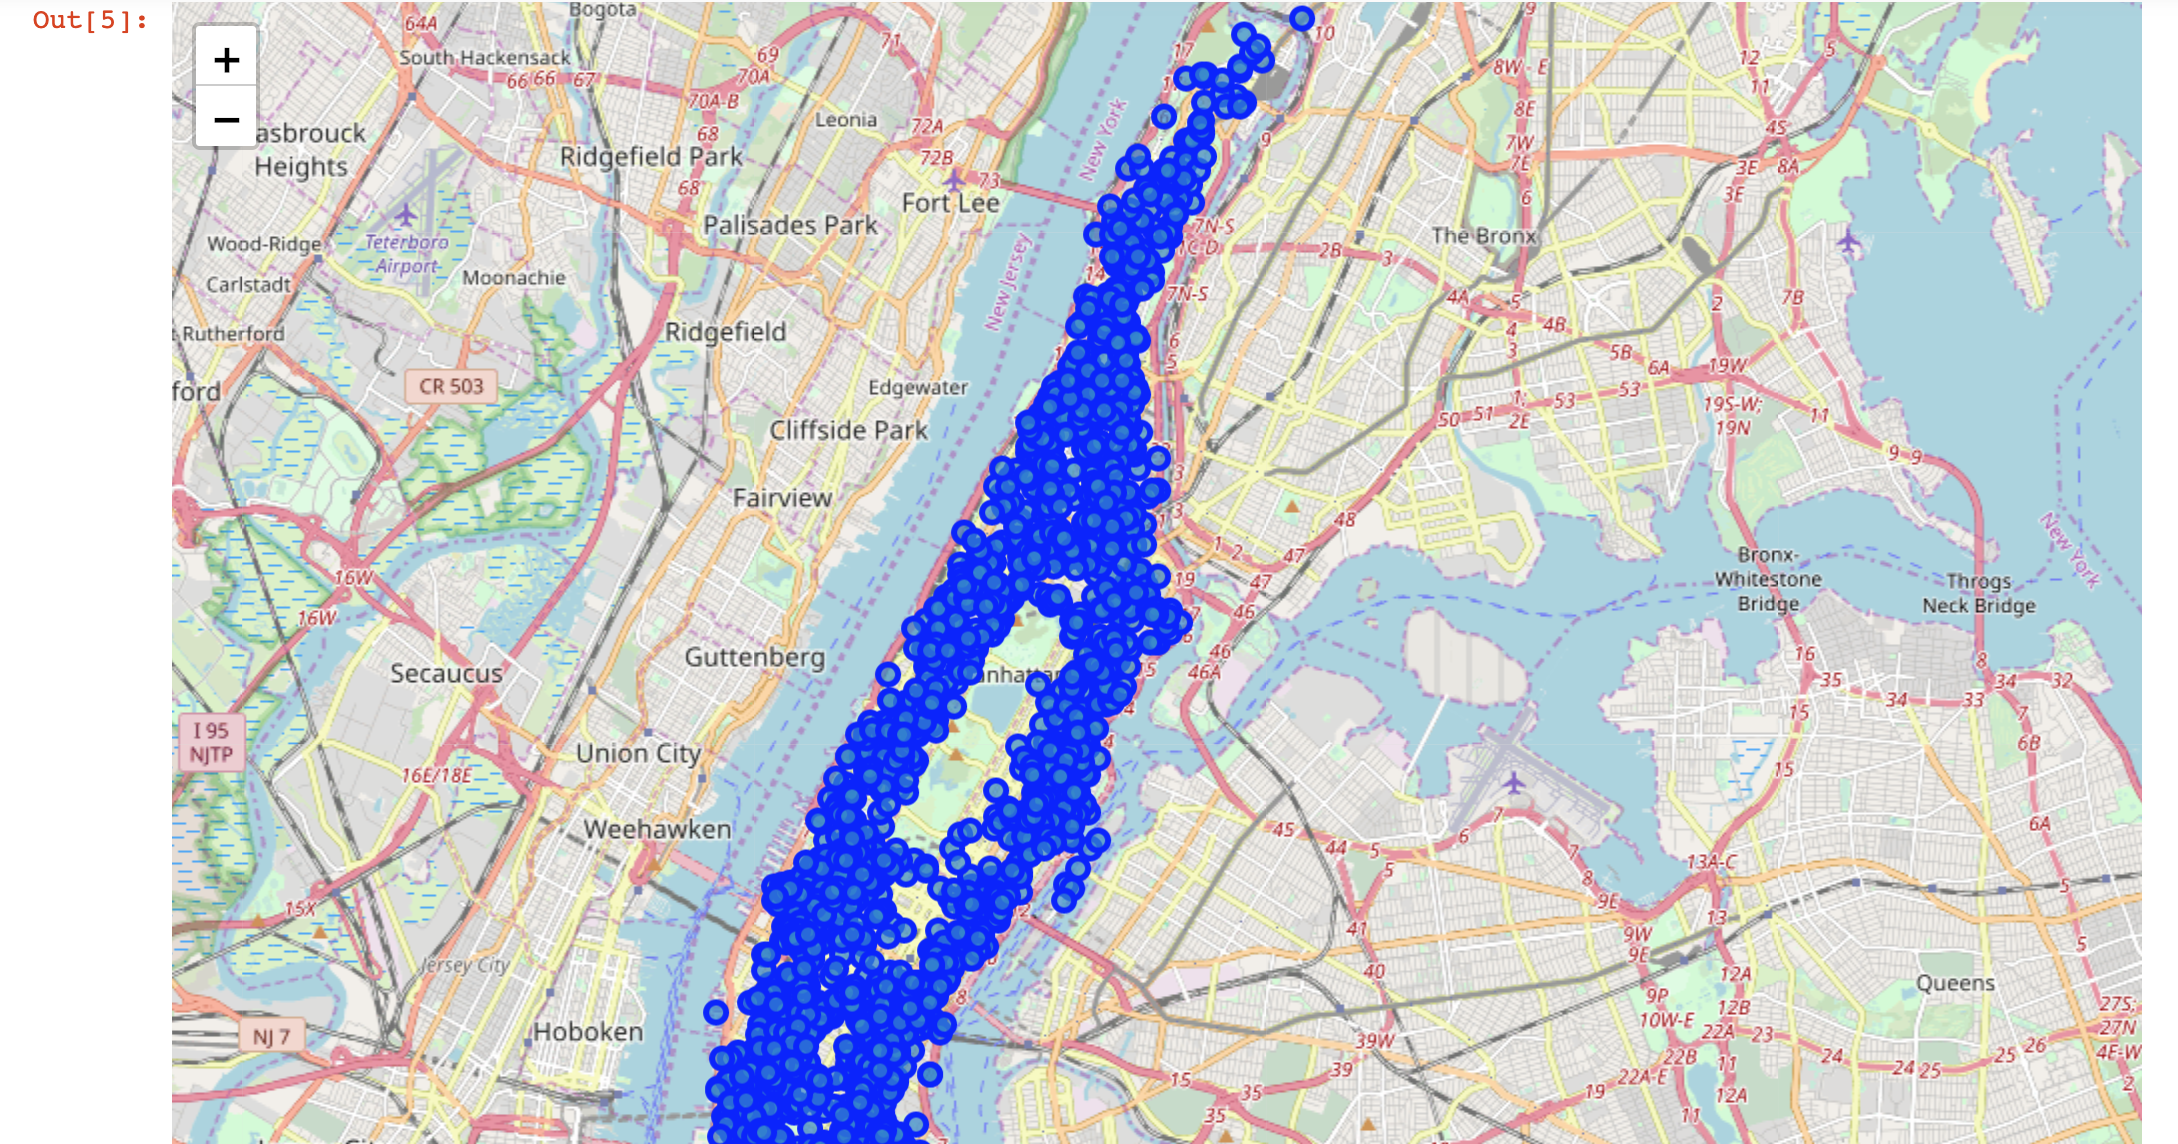

In [8]:
from PIL import Image
Image.open('screen.png')

## Explore Neighborhoods in Manhattan

In [19]:
CLIENT_ID = 'HMK2MMTYUEHGBKREGXILXYF245VXGG4CI4OOE05Q0QW1PAT4' # your Foursquare ID
CLIENT_SECRET = 'SNWWOWOTD204HOCHTJZFQWZGHYG10CXIRLSLEIAVUC4IJFQO' # your Foursquare Secret
VERSION = '20180323' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HMK2MMTYUEHGBKREGXILXYF245VXGG4CI4OOE05Q0QW1PAT4
CLIENT_SECRET:SNWWOWOTD204HOCHTJZFQWZGHYG10CXIRLSLEIAVUC4IJFQO


In [11]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=HMK2MMTYUEHGBKREGXILXYF245VXGG4CI4OOE05Q0QW1PAT4&client_secret=SNWWOWOTD204HOCHTJZFQWZGHYG10CXIRLSLEIAVUC4IJFQO&v=20180323&ll=-33.8670522,151.1957362&radius=500&limit=10'
results_0 = requests.get(url).json()
results_0

{'meta': {'code': 200, 'requestId': '5e6920ce1835dd001b302abb'},
 'response': {'headerLocation': 'Pyrmont',
  'headerFullLocation': 'Pyrmont, Sydney',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': -33.8625521955, 'lng': 151.201145599768},
   'sw': {'lat': -33.871552204500006, 'lng': 151.190326800232}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b1d8d59f964a5201e1224e3',
       'name': 'Pyrmont Bay Park',
       'contact': {},
       'location': {'address': 'Pirrama Rd',
        'crossStreet': 'Murray St',
        'lat': -33.86829278476674,
        'lng': 151.19723624638965,
        'labeledLatLngs': [{'label': 'display',
          'lat': -33.86829278476674,
          'lng': 151.19723624638965}],
        'di

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 10):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
manhattan_venues = getNearbyVenues(names=NYdata_df['Neighborhood'],
                                   latitudes=NYdata_df['Latitude'],
                                   longitudes=NYdata_df['Longitude']
                                  )
print(manhattan_venues.shape)
manhattan_venues.head()

Upper East Side
SoHo
Nolita
Lower East Side
Harlem
Greenwich Village
Midtown
Financial District
Battery Park City
Upper West Side
Hell's Kitchen
Harlem
Washington Heights
Midtown
Upper West Side
Midtown
Upper West Side
Upper West Side
Little Italy
Upper West Side
East Harlem
Financial District
Theater District
Chinatown
Murray Hill
Harlem
Lower East Side
Theater District
Lower East Side
Harlem
Upper West Side
Hell's Kitchen
Harlem
Morningside Heights
Washington Heights
Upper West Side
Lower East Side
East Harlem
Hell's Kitchen
Upper West Side
East Village
Tribeca
Upper West Side
East Village
Chelsea
Harlem
Upper West Side
East Harlem
Lower East Side
Nolita
East Harlem
Harlem
East Village
Chinatown
Upper West Side
Lower East Side
Midtown
West Village
East Village
Hell's Kitchen
Harlem
East Harlem
Upper East Side
Upper East Side
Hell's Kitchen
West Village
Hell's Kitchen
Chelsea
Lower East Side
Murray Hill
Washington Heights
East Harlem
West Village
Washington Heights
East Harlem
Washing

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Upper East Side               40.77553               -73.95343   
1  Upper East Side               40.77553               -73.95343   
2  Upper East Side               40.77553               -73.95343   
3  Upper East Side               40.77553               -73.95343   
4  Upper East Side               40.77553               -73.95343   

                               Venue  Venue Latitude  Venue Longitude  \
0                             Elio's       40.776783       -73.952736   
1               Y7 – Upper East Side       40.776495       -73.955594   
2  David's Hair Stylist & Barbershop       40.776989       -73.953607   
3                      Caledonia Bar       40.776254       -73.952899   
4                     Luke's Lobster       40.774805       -73.954423   

       Venue Category  
0  Italian Restaurant  
1         Yoga Studio  
2  Salon / Barbershop  
3                 Bar  
4  Seafood Restaurant

In [22]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                       10                      10     10   
Chelsea                                 90                      90     90   
Chinatown                               50                      50     50   
East Harlem                            130                     130    130   
East Village                           200                     200    200   
Financial District                     100                     100    100   
Gramercy                                10                      10     10   
Greenwich Village                       20                      20     20   
Harlem                                 280                     280    280   
Hell's Kitchen                         200                     200    200   
Inwood                                  10                      10     10   
Kips Bay                                10                      10     10   
Little Italy                            30                      30     30   
Lower East Side                        120                     120    120   
Midtown                                160                     160    160   
Morningside Heights                     50                      50     50   
Murray Hill                             50                      50     50   
NoHo                                    30                      30     30   
Nolita                                  30                      30     30   
SoHo                                    30                      30     30   
Theater District                        40                      40     40   
Tribeca                                 20                      20     20   
Two Bridges                             20                      20     20   
Upper East Side                        160                     160    160   
Upper West Side                        250                     250    250   
Washington Heights                     100                     100    100   
West Village                           130                     130    130   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City                10               10              10  
Chelsea                          90               90              90  
Chinatown                        50               50              50  
East Harlem                     130              130             130  
East Village                    200              200             200  
Financial District              100              100             100  
Gramercy                         10               10              10  
Greenwich Village                20               20              20  
Harlem                          280              280             280  
Hell's Kitchen                  200              200             200  
Inwood                           10               10              10  
Kips Bay                         10               10              10  
Little Italy                     30               30              30  
Lower East Side                 120              120             120  
Midtown                         160              160             160  
Morningside Heights              50               50              50  
Murray Hill                      50               50              50  
NoHo                             30               30              30  
Nolita                           30               30              30  
SoHo                             30               30              30  
Theater District                 40               40              40  
Tribeca                          20               20              20  
Two Bridges                      20               20              20  
Upper East S

In [23]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 253 uniques categories.


In [24]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Adult Boutique  African Restaurant  American Restaurant  \
0  Upper East Side               0                   0                    0   
1  Upper East Side               0                   0                    0   
2  Upper East Side               0                   0                    0   
3  Upper East Side               0                   0                    0   
4  Upper East Side               0                   0                    0   

   Amphitheater  Antique Shop  Argentinian Restaurant  Art Gallery  \
0             0             0                       0            0   
1             0             0                       0            0   
2             0             0                       0            0   
3             0             0                       0            0   
4             0             0                       0            0   

   Art Museum  Arts & Crafts Store  ...  Vegetarian / Vegan Restaurant  \
0           0                    0  ...                              0   
1           0                    0  ...                              0   
2           0                    0  ...                              0   
3           0                    0  ...                              0   
4           0                    0  ...                              0   

   Veterinarian  Vietnamese Restaurant  Watch Shop  Waterfront  Whisky Bar  \
0             0                      0           0           0           0   
1             0                      0           0           0           0   
2             0                      0           0           0           0   
3             0                      0           0           0           0   
4             0                      0           0           0           0   

   Wine Bar  Wine Shop  Women's Store  Yoga Studio  
0         0          0              0            0  
1         0          0              0            1  
2         0          0              0            0  
3         0          0              0            0  
4         0          0              0            0  

[5 rows x 254 columns]

In [25]:
manhattan_onehot.shape

(2330, 254)

In [27]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

Neighborhood  Adult Boutique  African Restaurant  American Restaurant  \
0  Battery Park City             0.0                 0.0             0.000000   
1            Chelsea             0.0                 0.0             0.011111   
2          Chinatown             0.0                 0.0             0.000000   
3        East Harlem             0.0                 0.0             0.015385   
4       East Village             0.0                 0.0             0.000000   

   Amphitheater  Antique Shop  Argentinian Restaurant  Art Gallery  \
0           0.0           0.0                     0.0     0.000000   
1           0.0           0.0                     0.0     0.022222   
2           0.0           0.0                     0.0     0.000000   
3           0.0           0.0                     0.0     0.000000   
4           0.0           0.0                     0.0     0.015000   

   Art Museum  Arts & Crafts Store  ...  Vegetarian / Vegan Restaurant  \
0    0.000000                 0.00  ...                       0.000000   
1    0.033333                 0.00  ...                       0.011111   
2    0.000000                 0.00  ...                       0.000000   
3    0.000000                 0.00  ...                       0.015385   
4    0.000000                 0.03  ...                       0.015000   

   Veterinarian  Vietnamese Restaurant  Watch Shop  Waterfront  Whisky Bar  \
0           0.0                  0.000         0.0         0.0         0.0   
1           0.0                  0.000         0.0         0.0         0.0   
2           0.0                  0.000         0.0         0.0         0.0   
3           0.0                  0.000         0.0         0.0         0.0   
4           0.0                  0.025         0.0         0.0         0.0   

   Wine Bar  Wine Shop  Women's Store  Yoga Studio  
0  0.000000   0.000000            0.0     0.000000  
1  0.000000   0.000000            0.0     0.066667  
2  0.000000   0.000000            0.0     0.000000  
3  0.015385   0.038462            0.0     0.007692  
4  0.055000   0.000000            0.0     0.010000  

[5 rows x 254 columns]

In [28]:
manhattan_grouped.shape

(27, 254)

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [122]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park                 Plaza   
1            Chelsea           Coffee Shop           Yoga Studio   
2          Chinatown          Cocktail Bar      Greek Restaurant   
3        East Harlem           Pizza Place                  Café   
4       East Village              Wine Bar                   Bar   

  3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0             Pet Store                   Garden                Museum   
1      Cuban Restaurant       Italian Restaurant      Tapas Restaurant   
2                Bakery  New American Restaurant           Pizza Place   
3    Mexican Restaurant             Cocktail Bar                  Park   
4   Japanese Restaurant              Coffee Shop             Juice Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Food Truck        Scenic Lookout           Coffee Shop   
1            Donut Shop          Cycle Studio            Art Museum   
2    Chinese Restaurant        Sandwich Place   Indie Movie Theater   
3                Bakery             Wine Shop            Taco Place   
4          Cocktail Bar                Bakery        Ice Cream Shop   

  9th Most Common Venue 10th Most Common Venue  
0               Dog Run    Dumpling Restaurant  
1                Lounge           Dance Studio  
2    Spanish Restaurant                    Spa  
3          Burger Joint     Italian Restaurant  
4   Arts & Crafts Store  Vietnamese Restaurant

In [123]:
# set number of clusters
kclusters = 26

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=9).fit(manhattan_grouped_clustering)

#score = metrics.calinski_harabaz_score(manhattan_grouped_clustering, kmeans) 
#print(score)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([10, 21, 17, 14, 24, 18,  9,  2, 13, 22], dtype=int32)

In [124]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = NYdata_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() 

id                                           name    host_id  \
9245    7066414            Fabulous Apartment with Soaking Tub   13347167   
38138  30103053         Stunning Huge Loft Prime SoHo position    2969845   
23284  18855694          SOHO/NOLITA GEM (NYC's BEST LOCATION)     764549   
9589    7363109                        Manhattan Getaway - LES   34834676   
42710  33155909  Spacious apt in NYC minutes away from midtown  249637449   

            host_name    Borough     Neighborhood  Latitude  Longitude  \
9245   AFI Apartments  Manhattan  Upper East Side  40.77553  -73.95343   
38138           Lucas  Manhattan             SoHo  40.72418  -73.99978   
23284             Joe  Manhattan           Nolita  40.72184  -73.99471   
9589           Loreta  Manhattan  Lower East Side  40.71729  -73.98442   
42710            Inna  Manhattan           Harlem  40.82311  -73.94749   

             room_type  price  ...     1st Most Common Venue  \
9245   Entire home/apt    120  ...        Italian Restaurant   
38138  Entire home/apt    500  ...            Clothing Store   
23284     Private room    142  ...  Mediterranean Restaurant   
9589   Entire home/apt    189  ...               Coffee Shop   
42710  Entire home/apt    130  ...               Coffee Shop   

                 2nd Most Common Venue          3rd Most Common Venue  \
9245                            Bakery                    Yoga Studio   
38138                   Cosmetics Shop              Electronics Store   
23284                   Chocolate Shop  Paper / Office Supplies Store   
9589                Italian Restaurant       Mediterranean Restaurant   
42710  Southern / Soul Food Restaurant                           Park   

       4th Most Common Venue     5th Most Common Venue  6th Most Common Venue  \
9245             Coffee Shop                       Gym                    Bar   
38138            Snack Place  Mediterranean Restaurant             Food Truck   
23284        Thai Restaurant                    Garden     Italian Restaurant   
9589               Juice Bar        Mexican Restaurant    Filipino Restaurant   
42710            Pizza Place        Mexican Restaurant              Wine Shop   

       7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
9245            Cycle Studio        Ice Cream Shop    Seafood Restaurant   
38138            Pizza Place              Beer Bar    Seafood Restaurant   
23284            Pizza Place                 Hotel    Falafel Restaurant   
9589          Ice Cream Shop            Club House              Boutique   
42710           Cocktail Bar             Jazz Club    Seafood Restaurant   

      10th Most Common Venue  
9245        Sushi Restaurant  
38138     Spanish Restaurant  
23284  Australian Restaurant  
9589       French Restaurant  
42710                 Bakery  

[5 rows x 27 columns]

In [107]:
NY_manhattan = NYdata[NYdata['Borough'] == 'Manhattan']

In [108]:
NY_manhattan_sum = NY_manhattan.groupby('Neighborhood').sum()
NY_manhattan_sum = NY_manhattan_sum[['reviews_per_month']]
NY_manhattan_sum = NY_manhattan_sum.reset_index()
NY_manhattan_sum

Neighborhood  reviews_per_month
0     Battery Park City              24.32
1               Chelsea            1038.89
2             Chinatown             439.51
3          Civic Center              23.27
4           East Harlem            1579.06
5          East Village            1668.40
6    Financial District             752.04
7     Flatiron District              72.57
8              Gramercy             294.78
9     Greenwich Village             282.29
10               Harlem            2956.23
11       Hell's Kitchen            2818.79
12               Inwood             192.55
13             Kips Bay             356.55
14         Little Italy             124.41
15      Lower East Side             919.93
16          Marble Hill               7.24
17              Midtown            1264.09
18  Morningside Heights             249.86
19          Murray Hill             314.26
20                 NoHo              49.72
21               Nolita             224.57
22     Roosevelt Island              69.97
23                 SoHo             329.65
24      Stuyvesant Town              25.86
25     Theater District             379.92
26              Tribeca              91.84
27          Two Bridges             143.73
28      Upper East Side            1523.66
29      Upper West Side            1487.27
30   Washington Heights             876.70
31         West Village             576.15

In [104]:

NYSUM = NYdata_df.groupby('Neighborhood').sum()

In [105]:
NYSUM = NYSUM[['reviews_per_month']]
NYSUM = NYSUM.reset_index()
NYSUM

Neighborhood  reviews_per_month
0     Battery Park City               0.00
1               Chelsea               5.34
2             Chinatown               4.44
3           East Harlem              19.63
4          East Village              16.22
5    Financial District               6.70
6              Gramercy               0.54
7     Greenwich Village               2.39
8                Harlem              48.61
9        Hell's Kitchen              33.40
10               Inwood               1.16
11             Kips Bay               0.00
12         Little Italy               0.99
13      Lower East Side               9.22
14              Midtown              14.83
15  Morningside Heights               0.06
16          Murray Hill               3.96
17                 NoHo               1.29
18               Nolita               1.95
19                 SoHo               1.09
20     Theater District               1.20
21              Tribeca               0.20
22          Two Bridges               2.21
23      Upper East Side               8.49
24      Upper West Side              18.53
25   Washington Heights              18.16
26         West Village               7.23

In [129]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#load json
world_geo = r'manhattan.geojson'

map_clusters.choropleth(
    geo_data=world_geo,
    data = NY_manhattan_sum,
    columns = ['Neighborhood','reviews_per_month'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Airbnb in Manhattan'
)

/usr/local/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [125]:

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

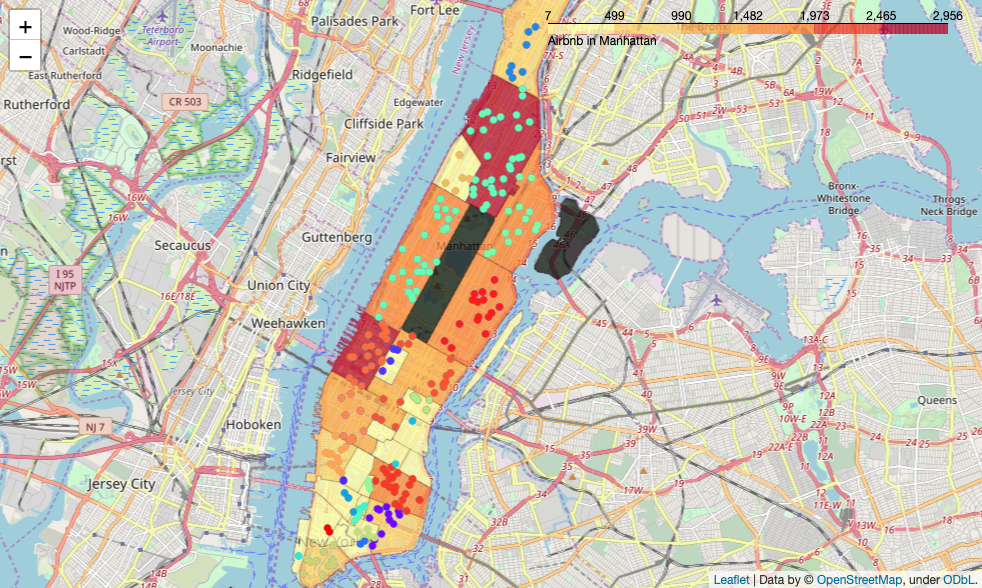

In [132]:
from PIL import Image
manhattan = Image.open('screen.png')
manhattan

In [127]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 22, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

name    Neighborhood  \
29206                      Luxury Times Square High Rise  Hell's Kitchen   
2086                    HELL'S KITCHEN STUDIO for 2 or 3  Hell's Kitchen   
19579                            Hudson Yards-Chelsea  ️  Hell's Kitchen   
16845           Gorgeous 1 Bedroom NYC + W/D in the Unit  Hell's Kitchen   
16312  STUNNING ONE BEDROOM IN THE HEART OF NEW YORK ...  Hell's Kitchen   
38149                           NY MANHATTAN DOUBLE ROOM  Hell's Kitchen   
8674                 Hell´s Kitchen, cozy functional 2br  Hell's Kitchen   
13362                    Spacious 1 bed near TIME SQUARE  Hell's Kitchen   
8721       Beautiful One Bedroom Apartment (Midtown) NYC  Hell's Kitchen   
23245  Manhattan Luxury High-Rise Apt w/ Unbeatable V...  Hell's Kitchen   
7591        New bldg~Junior 1~colombus circle~Terrace~WD  Hell's Kitchen   
8975                  Bright Large Hell's Kitchen Studio  Hell's Kitchen   
3946                 Ultimate Luxury Manhattan Apartment  Hell's Kitchen   
19153  Bluebird Hells Kitchen 2-BR Apt + Full Service...  Hell's Kitchen   
38154            Renovated Boutique Rough Luxe Apartment  Hell's Kitchen   
41325   Modern & Spacious 3 Bedroom  Apt in Times Square  Hell's Kitchen   
27341  Quiet Private First Floor Room with Self Check in  Hell's Kitchen   
20007        Clean style apt. Central midtwn near Javits  Hell's Kitchen   
38199                         Prime location cozy studio  Hell's Kitchen   
8872                    [306] 5 min WALK to Times Square  Hell's Kitchen   

       Latitude  Longitude        room_type  price  minimum_nights  \
29206  40.75857  -73.99189  Entire home/apt    300               3   
2086   40.76662  -73.99302  Entire home/apt    179               3   
19579  40.75751  -73.99401  Entire home/apt    175               1   
16845  40.76077  -73.99822  Entire home/apt    239              30   
16312  40.76550  -73.98682  Entire home/apt    250               7   
38149  40.75438  -73.99759     Private room    209               2   
8674   40.76110  -73.99316  Entire home/apt    150               4   
13362  40.76343  -73.99381  Entire home/apt    150              30   
8721   40.75335  -73.99525  Entire home/apt    180               3   
23245  40.76011  -73.98828  Entire home/apt    275               1   
7591   40.76646  -73.98805  Entire home/apt    185              30   
8975   40.76734  -73.98676  Entire home/apt    199               3   
3946   40.76852  -73.98735  Entire home/apt    150               1   
19153  40.76075  -73.99893  Entire home/apt    748              30   
38154  40.76375  -73.99201  Entire home/apt    250               6   
41325  40.75961  -73.98844  Entire home/apt    295               3   
27341  40.76945  -73.98798     Private room    125               2   
20007  40.75536  -73.99950     Private room    110               1   
38199  40.76207  -73.98935  Entire home/apt    160               1   
8872   40.76207  -73.98945     Private room    245               1   

       number_of_reviews last_review  reviews_per_month  ...  \
29206                  6  2019-05-26               0.32  ...   
2086                 209  2019-06-11               2.70  ...   
19579                 22  2019-07-02               1.04  ...   
16845                  1  2017-08-08               0.04  ...   
16312                 52  2018-09-04               1.40  ...   
38149                 11  2019-05-16               1.63  ...   
8674                   1  2015-07-05               0.02  ...   
13362                  1  2016-06-14               0.03  ...   
8721                   2  2019-05-19               0.76  ...   
23245                  0         NaN                NaN  ...   
7591                   6  2018-05-23               0.20  ...   
8975                  13  2019-05-28               0.27  ...   
3946                  94  2019-06-23               1.48  ...   
19153                  0         NaN                NaN  ...   
38154                  0

In [128]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

name      Neighborhood  \
45018                            A Studio fit for a King  Theater District   
8123                 Centrally Located Studio - Times Sq  Theater District   
20640      Great deal, full equiped room in Times Square  Theater District   
38721  Mod + Lux Theater District 1BR w/ Indoor pool ...  Theater District   

       Latitude  Longitude        room_type  price  minimum_nights  \
45018  40.76262  -73.98305     Private room    100               1   
8123   40.76295  -73.98435  Entire home/apt    230               1   
20640  40.75725  -73.98796     Private room    100               1   
38721  40.75971  -73.98551  Entire home/apt    347              30   

       number_of_reviews last_review  reviews_per_month  ...  \
45018                  0         NaN                NaN  ...   
8123                   1  2015-06-05               0.02  ...   
20640                 36  2017-11-26               1.18  ...   
38721                  0         NaN                NaN  ...   

       1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
45018                Theater                  Hotel  Performing Arts Venue   
8123                 Theater                  Hotel  Performing Arts Venue   
20640                Theater                  Hotel  Performing Arts Venue   
38721                Theater                  Hotel  Performing Arts Venue   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
45018                   Gym     French Restaurant               Exhibit   
8123                    Gym     French Restaurant               Exhibit   
20640                   Gym     French Restaurant               Exhibit   
38721                   Gym     French Restaurant               Exhibit   

      7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
45018                Office            Restaurant          Concert Hall   
8123                 Office            Restaurant          Concert Hall   
20640                Office            Restaurant          Concert Hall   
38721                Office            Restaurant          Concert Hall   

      10th Most Common Venue  
45018            Karaoke Bar  
8123             Karaoke Bar  
20640            Karaoke Bar  
38721            Karaoke Bar  

[4 rows x 23 columns]

In [133]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 16, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

name Neighborhood  Latitude  \
32899              Luxury 2 Bedroom Grand Central  Murray Hill  40.75058   
23036  Beautiful One bedroom in Midtown Manhattan  Murray Hill  40.75017   
47604                MURRAY HILL LUXURY APARTMENT  Murray Hill  40.74964   
23310  Furnished one bedroom in midtown Manhattan  Murray Hill  40.74960   
42688  Luxury 2BR/2BA by Grand Central with views  Murray Hill  40.74699   

       Longitude        room_type  price  minimum_nights  number_of_reviews  \
32899  -73.97746  Entire home/apt    200              30                  0   
23036  -73.97687  Entire home/apt    222              30                  0   
47604  -73.97203  Entire home/apt    280              30                  0   
23310  -73.97609  Entire home/apt    175              30                  5   
42688  -73.97301  Entire home/apt    375               2                 10   

      last_review  reviews_per_month  ...  1st Most Common Venue  \
32899         NaN                NaN  ...    Japanese Restaurant   
23036         NaN                NaN  ...    Japanese Restaurant   
47604         NaN                NaN  ...    Japanese Restaurant   
23310  2018-12-03               0.21  ...    Japanese Restaurant   
42688  2019-06-18               3.75  ...    Japanese Restaurant   

       2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
32899         Sandwich Place               Tea Room         Grocery Store   
23036         Sandwich Place               Tea Room         Grocery Store   
47604         Sandwich Place               Tea Room         Grocery Store   
23310         Sandwich Place               Tea Room         Grocery Store   
42688         Sandwich Place               Tea Room         Grocery Store   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
32899      Sushi Restaurant                  Park             Juice Bar   
23036      Sushi Restaurant                  Park             Juice Bar   
47604      Sushi Restaurant                  Park             Juice Bar   
23310      Sushi Restaurant                  Park             Juice Bar   
42688      Sushi Restaurant                  Park             Juice Bar   

      8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
32899          Burger Joint          Gourmet Shop    Hawaiian Restaurant  
23036          Burger Joint          Gourmet Shop    Hawaiian Restaurant  
47604          Burger Joint          Gourmet Shop    Hawaiian Restaurant  
23310          Burger Joint          Gourmet Shop    Hawaiian Restaurant  
42688          Burger Joint          Gourmet Shop    Hawaiian Restaurant  

[5 rows x 23 columns]

In [134]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 7, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

name Neighborhood  Latitude  \
38138         Stunning Huge Loft Prime SoHo position         SoHo  40.72418   
48177                 Cool Studio in SoHo, Manhattan         SoHo  40.72552   
19072  Private, cozy room in the Center of Manhattan         SoHo  40.72058   

       Longitude        room_type  price  minimum_nights  number_of_reviews  \
38138  -73.99978  Entire home/apt    500               5                  3   
48177  -74.00101  Entire home/apt    240               2                  0   
19072  -73.99807     Private room    120               3                 21   

      last_review  reviews_per_month  ...  1st Most Common Venue  \
38138  2019-04-09               0.46  ...         Clothing Store   
48177         NaN                NaN  ...         Clothing Store   
19072  2019-06-15               0.63  ...         Clothing Store   

       2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
38138         Cosmetics Shop      Electronics Store           Snack Place   
48177         Cosmetics Shop      Electronics Store           Snack Place   
19072         Cosmetics Shop      Electronics Store           Snack Place   

          5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
38138  Mediterranean Restaurant            Food Truck           Pizza Place   
48177  Mediterranean Restaurant            Food Truck           Pizza Place   
19072  Mediterranean Restaurant            Food Truck           Pizza Place   

      8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
38138              Beer Bar    Seafood Restaurant     Spanish Restaurant  
48177              Beer Bar    Seafood Restaurant     Spanish Restaurant  
19072              Beer Bar    Seafood Restaurant     Spanish Restaurant  

[3 rows x 23 columns]

In [135]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 12, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

name  Neighborhood  Latitude  Longitude  \
44521        Charming Room In Little Italy  Little Italy  40.71815  -73.99756   
734    REAL 2BR-HEART OF SOHO-LITTLE ITALY  Little Italy  40.71905  -73.99677   
24992              Quaint Nolita Apartment  Little Italy  40.72008  -73.99612   

             room_type  price  minimum_nights  number_of_reviews last_review  \
44521     Private room     51              30                  0         NaN   
734    Entire home/apt    199              28                 89  2018-06-30   
24992     Private room     95               3                  0         NaN   

       reviews_per_month  ...  1st Most Common Venue  2nd Most Common Venue  \
44521                NaN  ...               Wine Bar                   Café   
734                 0.99  ...               Wine Bar                   Café   
24992                NaN  ...               Wine Bar                   Café   

       3rd Most Common Venue 4th Most Common Venue     5th Most Common Venue  \
44521           Gourmet Shop        History Museum  Mediterranean Restaurant   
734             Gourmet Shop        History Museum  Mediterranean Restaurant   
24992           Gourmet Shop        History Museum  Mediterranean Restaurant   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
44521        Ice Cream Shop        Sandwich Place           Snack Place   
734          Ice Cream Shop        Sandwich Place           Snack Place   
24992        Ice Cream Shop        Sandwich Place           Snack Place   

      9th Most Common Venue 10th Most Common Venue  
44521    Spanish Restaurant         Chocolate Shop  
734      Spanish Restaurant         Chocolate Shop  
24992    Spanish Restaurant         Chocolate Shop  

[3 rows x 23 columns]

## Conclusion

In [136]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 19, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

name         Neighborhood  \
10133                    Private bedroom and bathroom  Morningside Heights   
2920                    Clean room near Columbia Univ  Morningside Heights   
48285  Your relaxing escape - studio apartment in NYC  Morningside Heights   
25357                  Sunny 1br across from the park  Morningside Heights   
33055        Spacious Studio Near Columbia University  Morningside Heights   

       Latitude  Longitude        room_type  price  minimum_nights  \
10133  40.80610  -73.96641     Private room     90               1   
2920   40.81326  -73.96181     Private room    220               1   
48285  40.80739  -73.96068  Entire home/apt    150               2   
25357  40.80711  -73.95826  Entire home/apt    114               1   
33055  40.80395  -73.96311  Entire home/apt    113              45   

       number_of_reviews last_review  reviews_per_month  ...  \
10133                  1  2015-08-14               0.02  ...   
2920                   0         NaN                NaN  ...   
48285                  0         NaN                NaN  ...   
25357                  1  2017-08-20               0.04  ...   
33055                  0         NaN                NaN  ...   

       1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
10133                   Park            Coffee Shop    American Restaurant   
2920                    Park            Coffee Shop    American Restaurant   
48285                   Park            Coffee Shop    American Restaurant   
25357                   Park            Coffee Shop    American Restaurant   
33055                   Park            Coffee Shop    American Restaurant   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
10133             Bookstore    Seafood Restaurant            Playground   
2920              Bookstore    Seafood Restaurant            Playground   
48285             Bookstore    Seafood Restaurant            Playground   
25357             Bookstore    Seafood Restaurant            Playground   
33055             Bookstore    Seafood Restaurant            Playground   

      7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
10133        Farmers Market     Outdoor Sculpture                   Pub   
2920         Farmers Market     Outdoor Sculpture                   Pub   
48285        Farmers Market     Outdoor Sculpture                   Pub   
25357        Farmers Market     Outdoor Sculpture                   Pub   
33055        Farmers Market     Outdoor Sculpture                   Pub   

      10th Most Common Venue  
10133                   Café  
2920                    Café  
48285                   Café  
25357                   Café  
33055                   Café  

[5 rows x 23 columns]

  * Harlem and Hell's kitchen area can have the most sales each month. They are currecntly the best neighborood to start a business
  * The Cluster 22 and Cluster 3 has great difference in sales. From the common venue , we can notice that Hotel can be venom to any Airbnb hosts. Places around coffee shops are mostly quiet and living friendly.